In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs

    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':9,'weight':'bold'})
rc('text', usetex=True)
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))

fm.findfont("serif", rebuild_if_missing=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf'

In [4]:
## Load the temperatures and other parameters #

In [5]:
from scipy.optimize import curve_fit

In [6]:
foldername = '../../MFUs/Runs_15-09-20_EasyPhase_L8/'
filenamelist = ['KEasyPhase_L8_it0_nsm1048576_nips2_folder/backup']
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist)

In [7]:
foldername = '../../MFUs/Runs_04-09-20_EasyPhase_L8/'
filenamelist = ['KEasyPhase_L8_it0_nsm524288_folder/backup']
[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots2, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist)

In [33]:
# Create a folder to save the pictures
foldername = '../../MFUs/OverviewEasyPhase/'
#foldername = '../Analysis_PSI/Runs_12-11-19_ssfMagnField/'
results_foldername = 'Results_14-10-20_Mash_15-09/'
os.makedirs('./' + foldername + results_foldername, exist_ok = True)

filenamelist= ['../../MFUs/Runs_15-09-20_EasyPhase_L4/Results_02-12-20_nsms524288x4_nips2/',
               #'../../MFUs/Runs_04-09-20_EasyPhase_L4/Results_14-09-20/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L6/Results_02-12-20_nsms1048576x2_nips2/',
               #'../../MFUs/Runs_04-09-20_EasyPhase_L6/Results_14-09-20/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L8/Results_02-12-20_nsms1048576x2_nips2/',
               #'../../MFUs/Runs_04-09-20_EasyPhase_L8/Results_14-09-20/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L10/Results_02-12-20_nsms524288x4_nips2/',
               #'../../MFUs/Runs_04-09-20_EasyPhase_L10/Results_14-09-20/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L12/Results_02-12-20_nsms524288x4_nips2/',
               #'../../MFUs/Runs_04-09-20_EasyPhase_L12/Results_14-09-20/',
               '../../MFUs/Runs_15-09-20_EasyPhase_L14/Results_02-12-20_nsms524288_nips2/',
               #'../../MFUs/Runs_15-09-20_EasyPhase_L16/Results_13-10-20_nsms524288_nips2/',
               #'../../MFUs/Runs_15-09-20_EasyPhase_L16/Results_02-12-20_nsms524288_nips2/'
]
n = len(filenamelist)

In [34]:
temperatures[0][-1]

40.000000000000014

In [35]:
L = [4,6,8,10,12#,14,16]
fmts =['.','_','*','v','x','o','^']
S = []
Smin = []
Smax =[]
SE = []
SEmin = []
SEmax =[]
C = []
ErrC = []

for i, filename in enumerate(filenamelist):
    S.append(np.loadtxt(filename +"/AvgS.txt" ))
    Smin.append(np.loadtxt(filename +"/AvgSmin.txt" ))
    Smax.append(np.loadtxt(filename +"/AvgSmax.txt" ))
    SE.append(np.loadtxt(filename +"/AvgSE.txt" ))
    SEmin.append(np.loadtxt(filename +"/AvgSEmin.txt" ))
    SEmax.append(np.loadtxt(filename +"/AvgSEmax.txt" ))
    C.append(np.loadtxt(filename +"/AvgC.txt" ))
    ErrC.append(np.loadtxt(filename +"/ErrC.txt" ))

# Correction at high temperature

In [36]:
def poly(x, b, c):
    return b*x+ c

In [37]:
#tmin = 196
#tmax = 216
#tvals = np.array(temperatures[0][tmin:tmax])
#plt.figure()
#plt.plot(tvals**2, 1/C[6][tmin:tmax],'.')
#[popt, perr] = curve_fit(poly, tvals**2, 1/C[6][tmin:tmax])
#plt.plot(tvals**2, poly(tvals**2,*popt))                        
#plt.xlabel(r'$T^2$')
#plt.ylabel(r'$1/c$')
#print(popt)
#print(2/(popt[0]*temperatures[0][-1]**3))
#print("Factor : ", 1/popt[0])

In [38]:
#margin = [0.12, 0.2, 0.02, 0.02]
#figsize = (6,4)
#markersize = 2
#hid = 0
#plt.figure(figsize=figsize,dpi=300)
#plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
#for i in range(n):
#    temp = temperatures_plots[0]
#    tidmin = 0
#    tidmax = len(temperatures_plots[0])-1
#    plt.semilogx(temp[tidmin:tidmax],
#                 C[i][tidmin:tidmax],fmts[i], markersize=markersize,\
#                      label = r'$N$ = {0}'.format(9*L[i]**2))
#    plt.fill_between(temp[tidmin:tidmax],
#                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
#                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
#                     alpha=0.2)
#plt.xlabel(r'$T/|J_2|$')
#plt.ylabel(r'$c$')
#plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
#plt.legend(loc= 'best', ncol = 1, framealpha=0.5)
#plt.savefig('./' + foldername  + results_foldername+ '/SpecificHeatPerSite_VariousSizes.png')
#
#
#plt.figure(figsize=figsize,dpi=300)
#plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
#for i in range(n):
#    temp = temperatures_plots2[0]
#    tidmin = 0
#    tidmax = len(temperatures_plots2[0])-1
#    plt.semilogx(temp[tidmin:tidmax],
#                 C[i][tidmin:tidmax]/temp[tidmin:tidmax],
#                 fmts[i], markersize=markersize,\
#                      label = r'$N$ = {0}'.format(9*L[i]**2))
#    plt.fill_between(temp[tidmin:tidmax],
#                     (C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax])/temp[tidmin:tidmax],
#                     (C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax])/temp[tidmin:tidmax],
#                     alpha=0.2)
#plt.xlabel(r'$T/|J_2|$')
#plt.ylabel(r'$c/T$')
#plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
#plt.legend(loc= 'best', ncol = 1, framealpha=0.5)
#plt.savefig('./' + foldername  + results_foldername+ '/CPerSiteoverT_VariousSizes.png')
#
#plt.figure(figsize=figsize,dpi=300)
#plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
#
#for i in range(n):
#    temp = temperatures_plots[0]
#    tidmin = 0
#    tidmax = len(temperatures_plots[0])-1
#    plt.semilogx(temp[tidmin:tidmax],
#                 S[i][tidmin:tidmax],
#                 fmts[i], markersize=markersize,\
#                      label = r'$N$ = {0}'.format(9*L[i]**2))
#    plt.fill_between(temp[tidmin:tidmax],
#                     Smin[i][tidmin:tidmax],
#                     Smax[i][tidmin:tidmax],
#                     alpha=0.2)
#
#plt.plot([temp[tidmin],temp[tidmax]], [0.262, 0.262])
#plt.xlabel(r'$T/|J_2|$')
#plt.ylabel(r'$S$')
#plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
#plt.legend(loc= 'best', ncol = 1, framealpha=0.5)
#plt.savefig('./' + foldername  + results_foldername+ '/Entropy_VariousSizes.png')

# Main plot

In [39]:
xdata = (3*np.array(L)) # x ~ L where N = L^2
ydata = np.array(S)[:,0]
vSmax = np.array(Smax)[:,0]
vSmin = np.array(Smin)[:,0]
sigma = (vSmax - vSmin)/2
xvals = 3*np.linspace(4,10000,30000)


ovxdata = 1/xdata;
ovxvals = np.linspace(0.005, 0.085,81)

In [45]:
n = 5

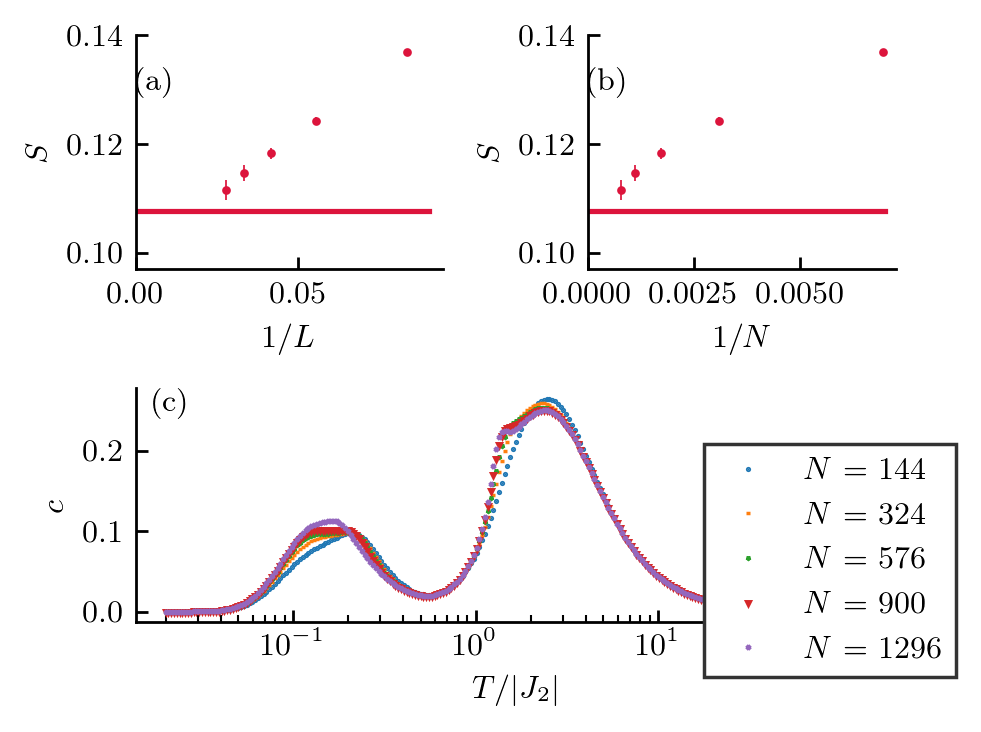

In [47]:
plt.subplots(2,2, figsize = (4,3), dpi = 250)
markersize = 1
ax1 = plt.subplot(212)
for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 0 
    tidmax = len(temperatures_plots[0])-1
    ax1.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax],fmts[i], markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    ax1.fill_between(temp[tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
ax1.set_xlabel(r'$T/|J_2|$', fontweight = 'bold')
ax1.set_xlim([None, 200])
ax1.set_ylabel(r'$c$', fontweight = 'bold')
ax1.tick_params(which = 'both', direction = 'in')
ax1.legend(ncol = 1, loc = 'lower right', bbox_to_anchor = [1.1,-0.3], framealpha = 1,fancybox = False,edgecolor = '0.2')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.text(0.017,0.25, '(c)')


ylims = [0.097, 0.14]
ax2 = plt.subplot(222)
xvals2 = np.linspace(0,0.007)
sizes = np.array([1/(9*(L[i]**2)) for i in range(n)])
values = np.array([S[i][0] for i in range(n)])
for i in range(n):
    ax2.errorbar(1/(9*L[i]**2),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=3, elinewidth = 0.5,color = 'crimson')
#    ax2.errorbar(1/(9*L[i]**2),SE[i][0], yerr = [[abs(SE[i][0]-SEmin[i][0])],[abs(SE[i][0]-SEmax[i][0])]],
#                 fmt = '.', markersize=3, elinewidth = 0.5,color = 'blue')
ax2.set_xlabel(r'$1/N$')
ax2.set_ylabel(r'$S$')
ax2.set_xlim([0,None])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(direction = 'in')
ax2.text(0.0,0.13, '(b)')
ax2.set_ylim(ylims)

#ax2.plot(xvals2, poly2(xvals2, *popt3), ':', linewidth=1,color = 'lightblue')
#ax2.errorbar(0, popt3[-1], yerr = np.sqrt(perr3[-1,-1]), color = 'lightblue')
ax2.plot([-0.001, 0.007],[0.1076887, 0.1076887], color = 'crimson')

#axin2 = ax2.inset_axes([0.2, 0.6, 0.3,0.3])
axin2 = plt.subplot(221)
xvals = np.linspace(0,0.09)

axin2.plot([-0.001, 0.09],[0.1076887, 0.1076887], color = 'crimson')

#axin2.plot(xvals,poly(xvals, *popt), ':', linewidth = 1, color = 'lightgrey')
#axin2.errorbar(0, popt[-1], yerr = np.sqrt(perr[-1,-1]), color = 'lightgrey')
#axin2.plot(xvals,poly(xvals, *popt2), '--', color = 'lightblue')
#axin2.errorbar(0, popt2[-1], yerr = np.sqrt(perr2[-1,-1]), color = 'lightblue')
for i in range(n):
    axin2.errorbar(1/(3*L[i]),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=3, elinewidth = 0.5,color = 'crimson')
#    axin2.errorbar(1/(3*L[i]),SE[i][0], yerr = [[abs(SE[i][0]-SEmin[i][0])],[abs(SE[i][0]-SEmax[i][0])]],
#                 fmt = '.', markersize=3, elinewidth = 0.5,color = 'blue')

axin2.set_xlabel(r'$1/L$')
axin2.set_ylabel(r'$S$')
axin2.set_ylim(ylims)
axin2.text(0.0,0.13, '(a)')
axin2.set_xlim([0,None])
axin2.tick_params(direction = 'in')

axin2.spines['top'].set_visible(False)
axin2.spines['right'].set_visible(False)

plt.tight_layout()


plt.savefig('./' + foldername  + results_foldername+ '/MCFailingEntropy.pdf')

# Entropic corrections (by increasing order)

### 0. Data to fit:

In [16]:
xdata = (3*np.array(L)) # x ~ L where N = L^2
ydata = np.array(SE)[:,0]
vSEmax = np.array(SEmax)[:,0]
vSEmin = np.array(SEmin)[:,0]
sigma = (vSEmax - vSEmin)/2
xvals = 3*np.linspace(4,10000,30000)


ovxdata = 1/xdata;
ovxvals = np.linspace(0.005, 0.085,81)
print(ovxvals)

[0.005 0.006 0.007 0.008 0.009 0.01  0.011 0.012 0.013 0.014 0.015 0.016
 0.017 0.018 0.019 0.02  0.021 0.022 0.023 0.024 0.025 0.026 0.027 0.028
 0.029 0.03  0.031 0.032 0.033 0.034 0.035 0.036 0.037 0.038 0.039 0.04
 0.041 0.042 0.043 0.044 0.045 0.046 0.047 0.048 0.049 0.05  0.051 0.052
 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06  0.061 0.062 0.063 0.064
 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072 0.073 0.074 0.075 0.076
 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084 0.085]


### 1. 1/N corrections

In [17]:
def poly(x, a, g):
    return a + g/x**2

In [18]:
def poly2(ovx, a, g):
    return a + g*(ovx**2)

In [19]:
idmin = 0
idmax = 3
[popt, perr] = curve_fit(poly, xdata[idmin:idmax], ydata[idmin:idmax], sigma = sigma[idmin:idmax], absolute_sigma = False)
[popt2, perr2] = curve_fit(poly2, ovxdata[idmin:idmax], ydata[idmin:idmax], sigma = sigma[idmin:idmax], absolute_sigma = False)

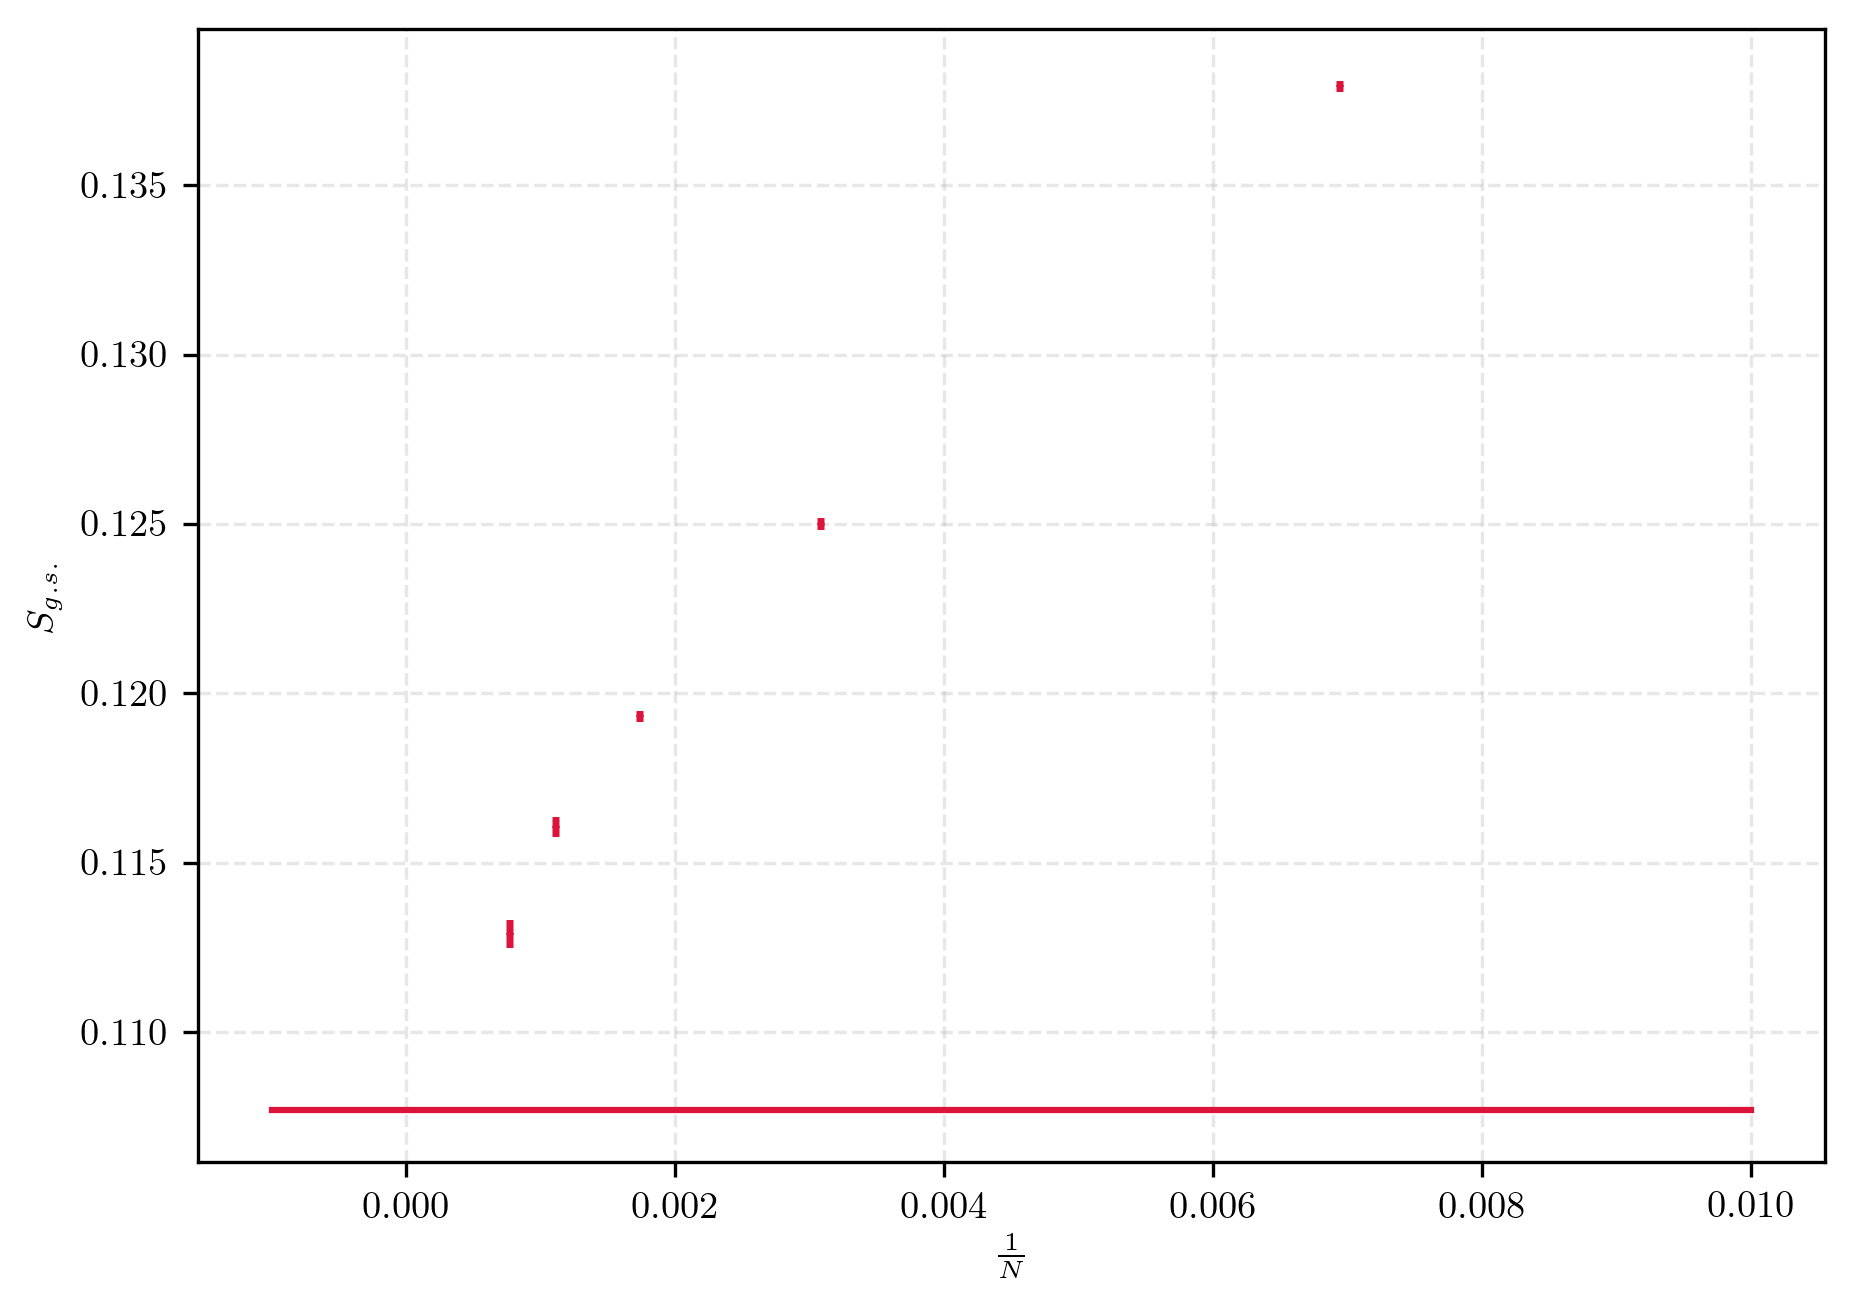

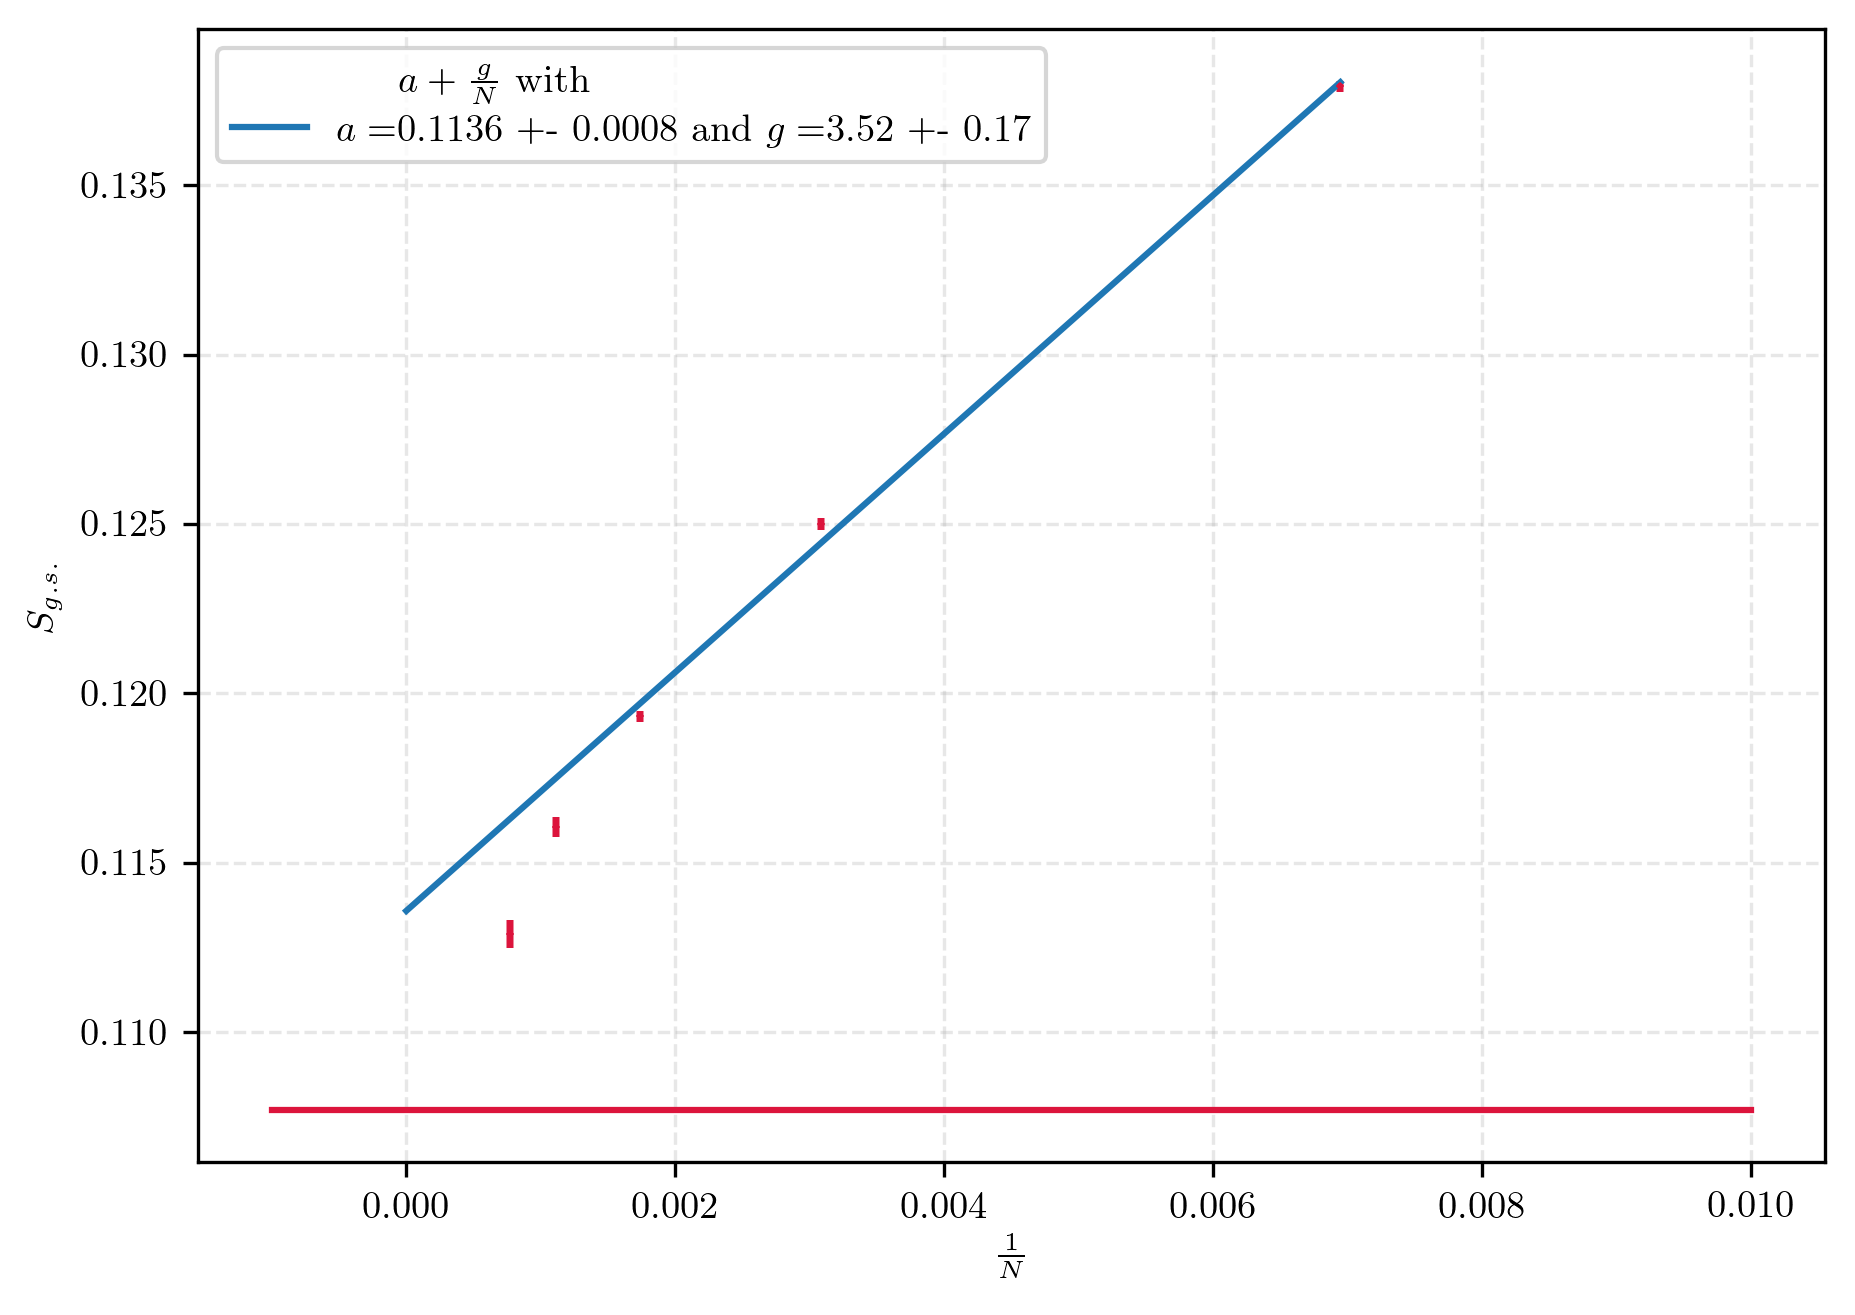

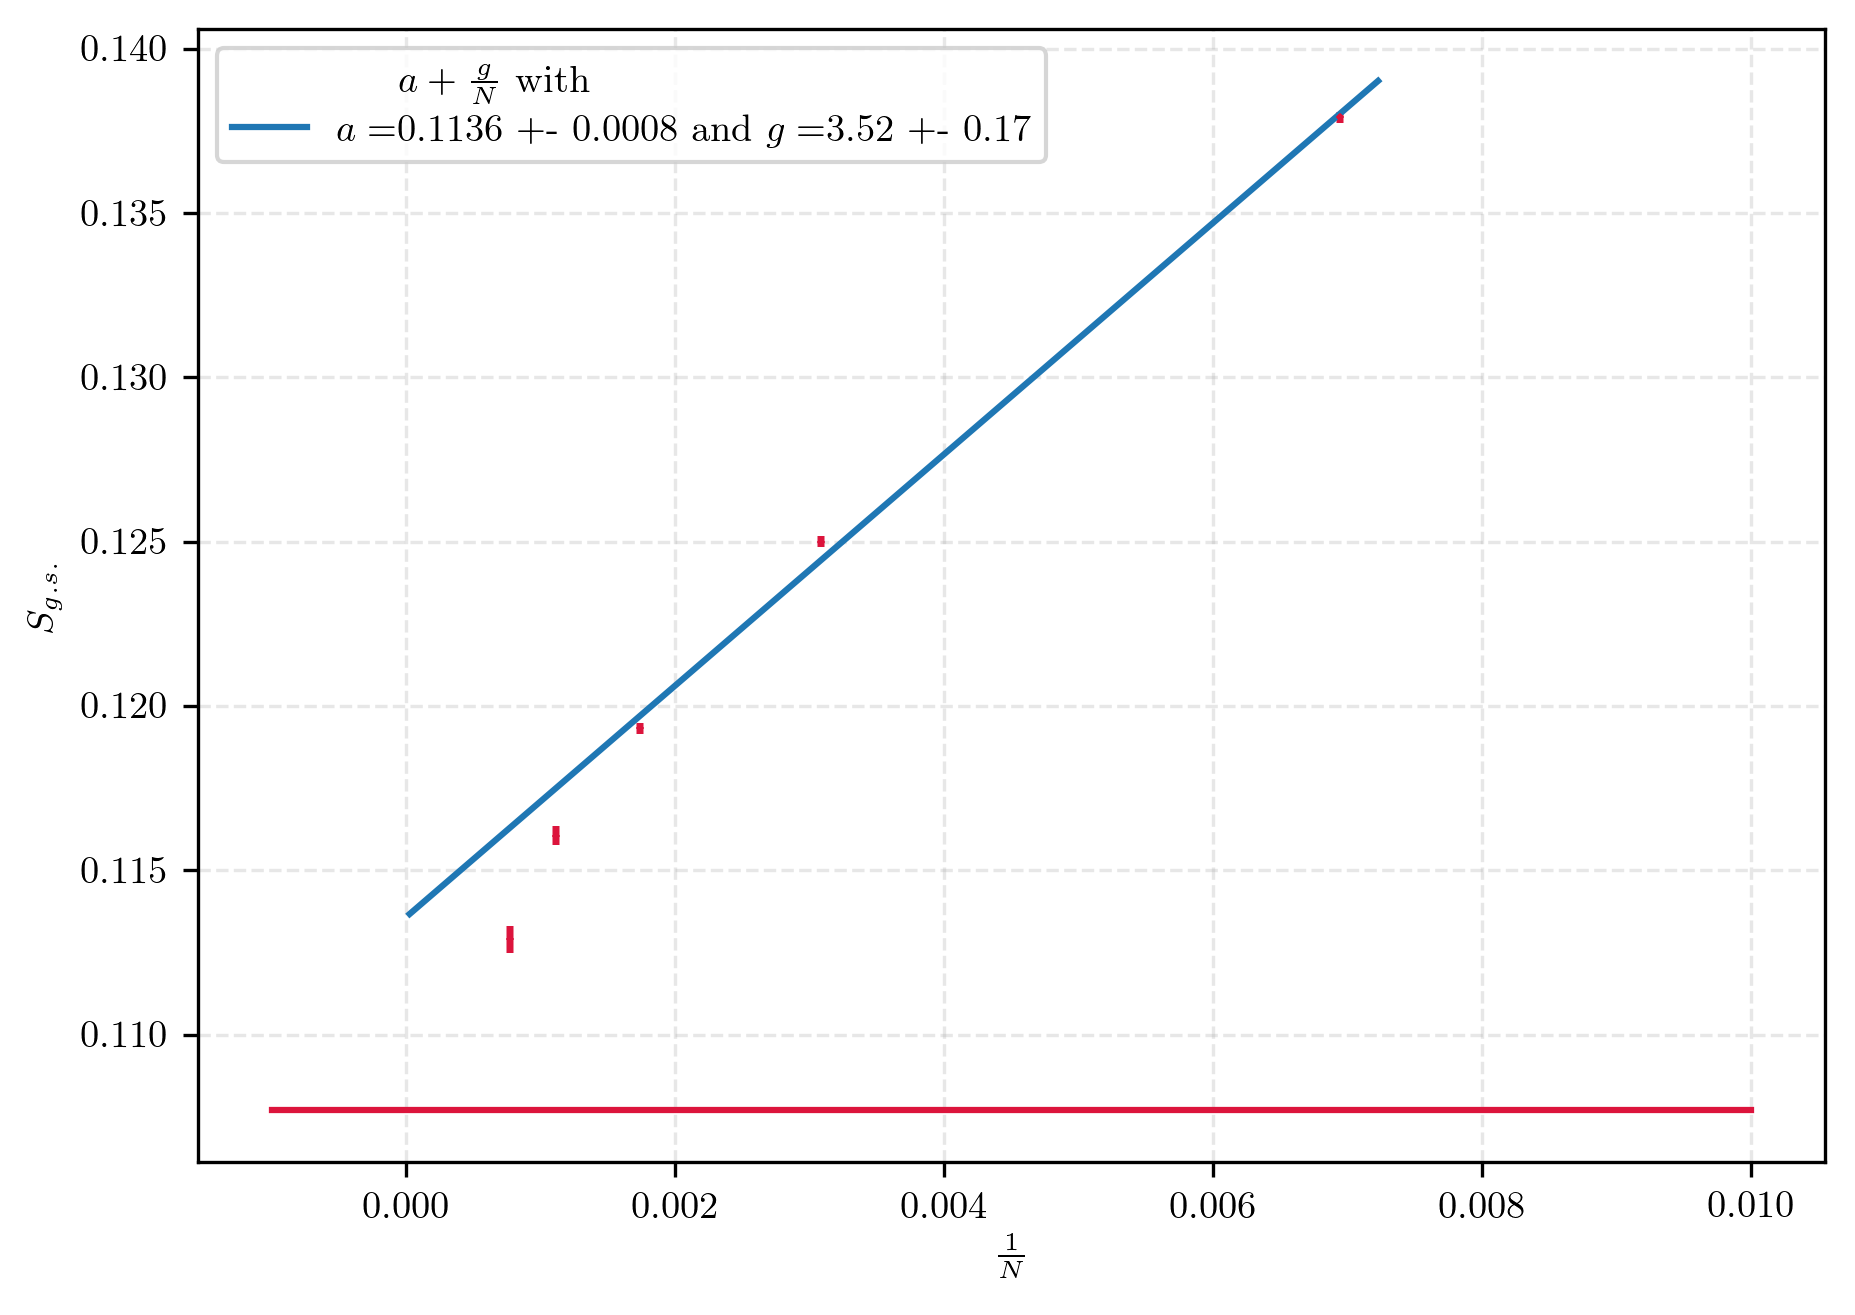

In [20]:
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
for i in range(n):
    ax.errorbar(1/(xdata**2),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.01],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{N}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)

fitlabel = r"$a + \frac{g}{N}$ with \\ $a = $" + f"{popt[0]:.4f} +- {np.sqrt(perr[0,0]):.4f} and "+\
r"$g = $" + f"{popt[1]:.2f} +- {np.sqrt(perr[1,1]):.2f}"
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
plt.plot(1./xvals**2,poly(xvals,*popt), label = fitlabel)
for i in range(n):
    ax.errorbar(1/(xdata**2),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.01],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{N}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.legend()
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)

fitlabel = r"$a + \frac{g}{N}$ with \\ $a = $" + f"{popt2[0]:.4f} +- {np.sqrt(perr2[0,0]):.4f} and "+\
r"$g = $" + f"{popt2[1]:.2f} +- {np.sqrt(perr2[1,1]):.2f}"
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
plt.plot(ovxvals**2,poly2(ovxvals,*popt2), label = fitlabel)
for i in range(n):
    ax.errorbar(1/(xdata**2),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.01],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{N}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.legend()
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)


### 2. 1/(L log L) corrections

In [21]:
def LlogLfitSimple(x, a, d):
    return a + d/(x*np.log(x))

In [22]:
def LlogLfitSimple2(ovx, a, d):
    return a - d*ovx/np.log(ovx)

In [23]:
idmin = 0
idmax = 5
abssigma = True
[popt, perr] = curve_fit(LlogLfitSimple, xdata[idmin:idmax], ydata[idmin:idmax], sigma = 2*sigma[idmin:idmax], absolute_sigma = abssigma)
print("a = ", f"{popt[0]:.4f} +/- {np.sqrt(perr[0,0]):.4f}")
print("d = ", f"{popt[1]:.4f} +/- {np.sqrt(perr[1,1]):.4f}")
[popt2, perr2] = curve_fit(LlogLfitSimple2, ovxdata[idmin:idmax], ydata[idmin:idmax], sigma = 2*sigma[idmin:idmax], absolute_sigma = abssigma)
print("a = ", f"{popt2[0]:.4f} +/- {np.sqrt(perr2[0,0]):.4f}")
print("d = ", f"{popt2[1]:.4f} +/- {np.sqrt(perr2[1,1]):.4f}")


a =  0.1070 +/- 0.0004
d =  0.9236 +/- 0.0191
a =  0.1070 +/- 0.0004
d =  0.9236 +/- 0.0191


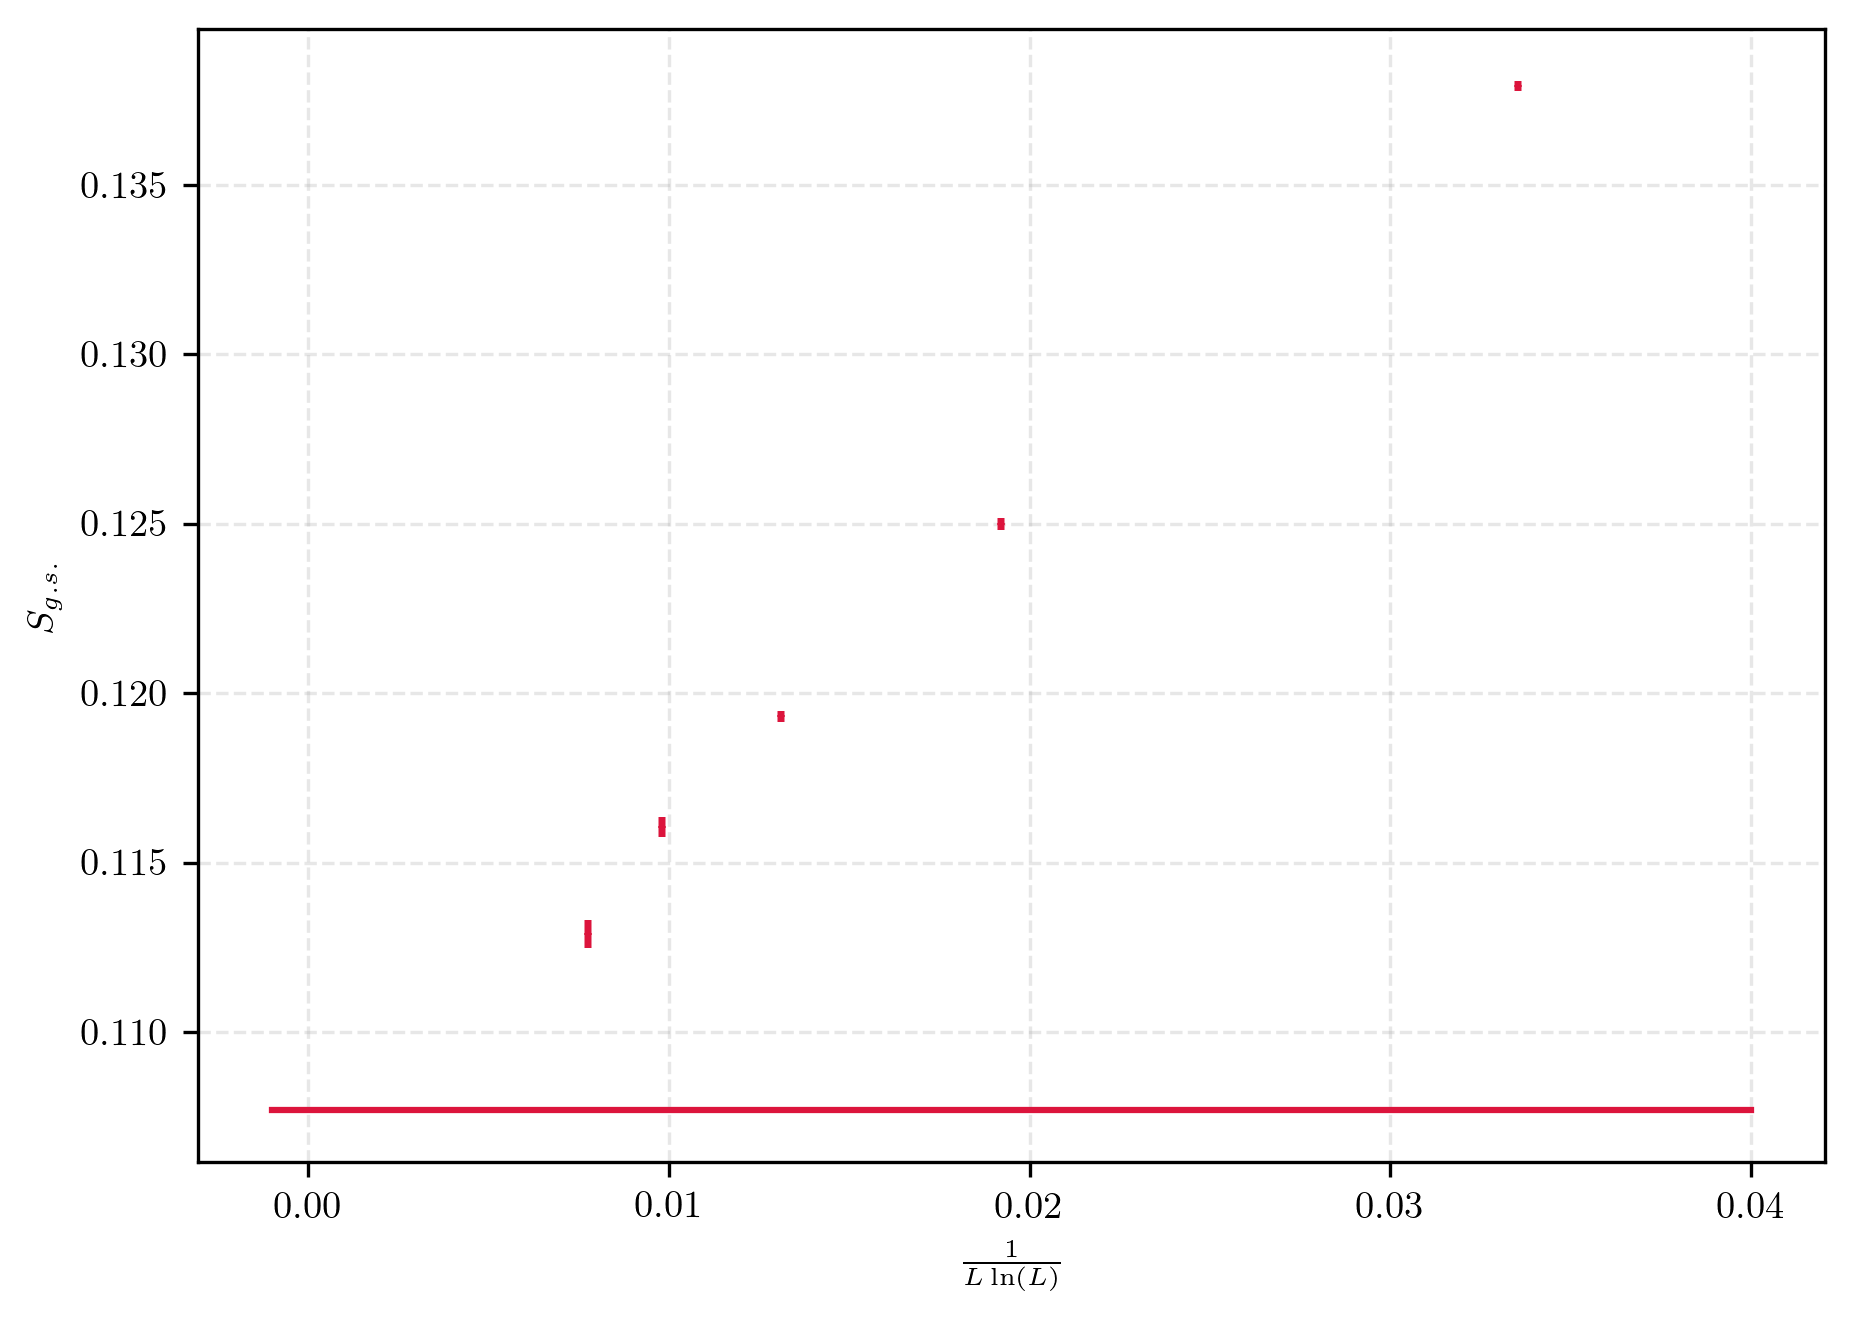

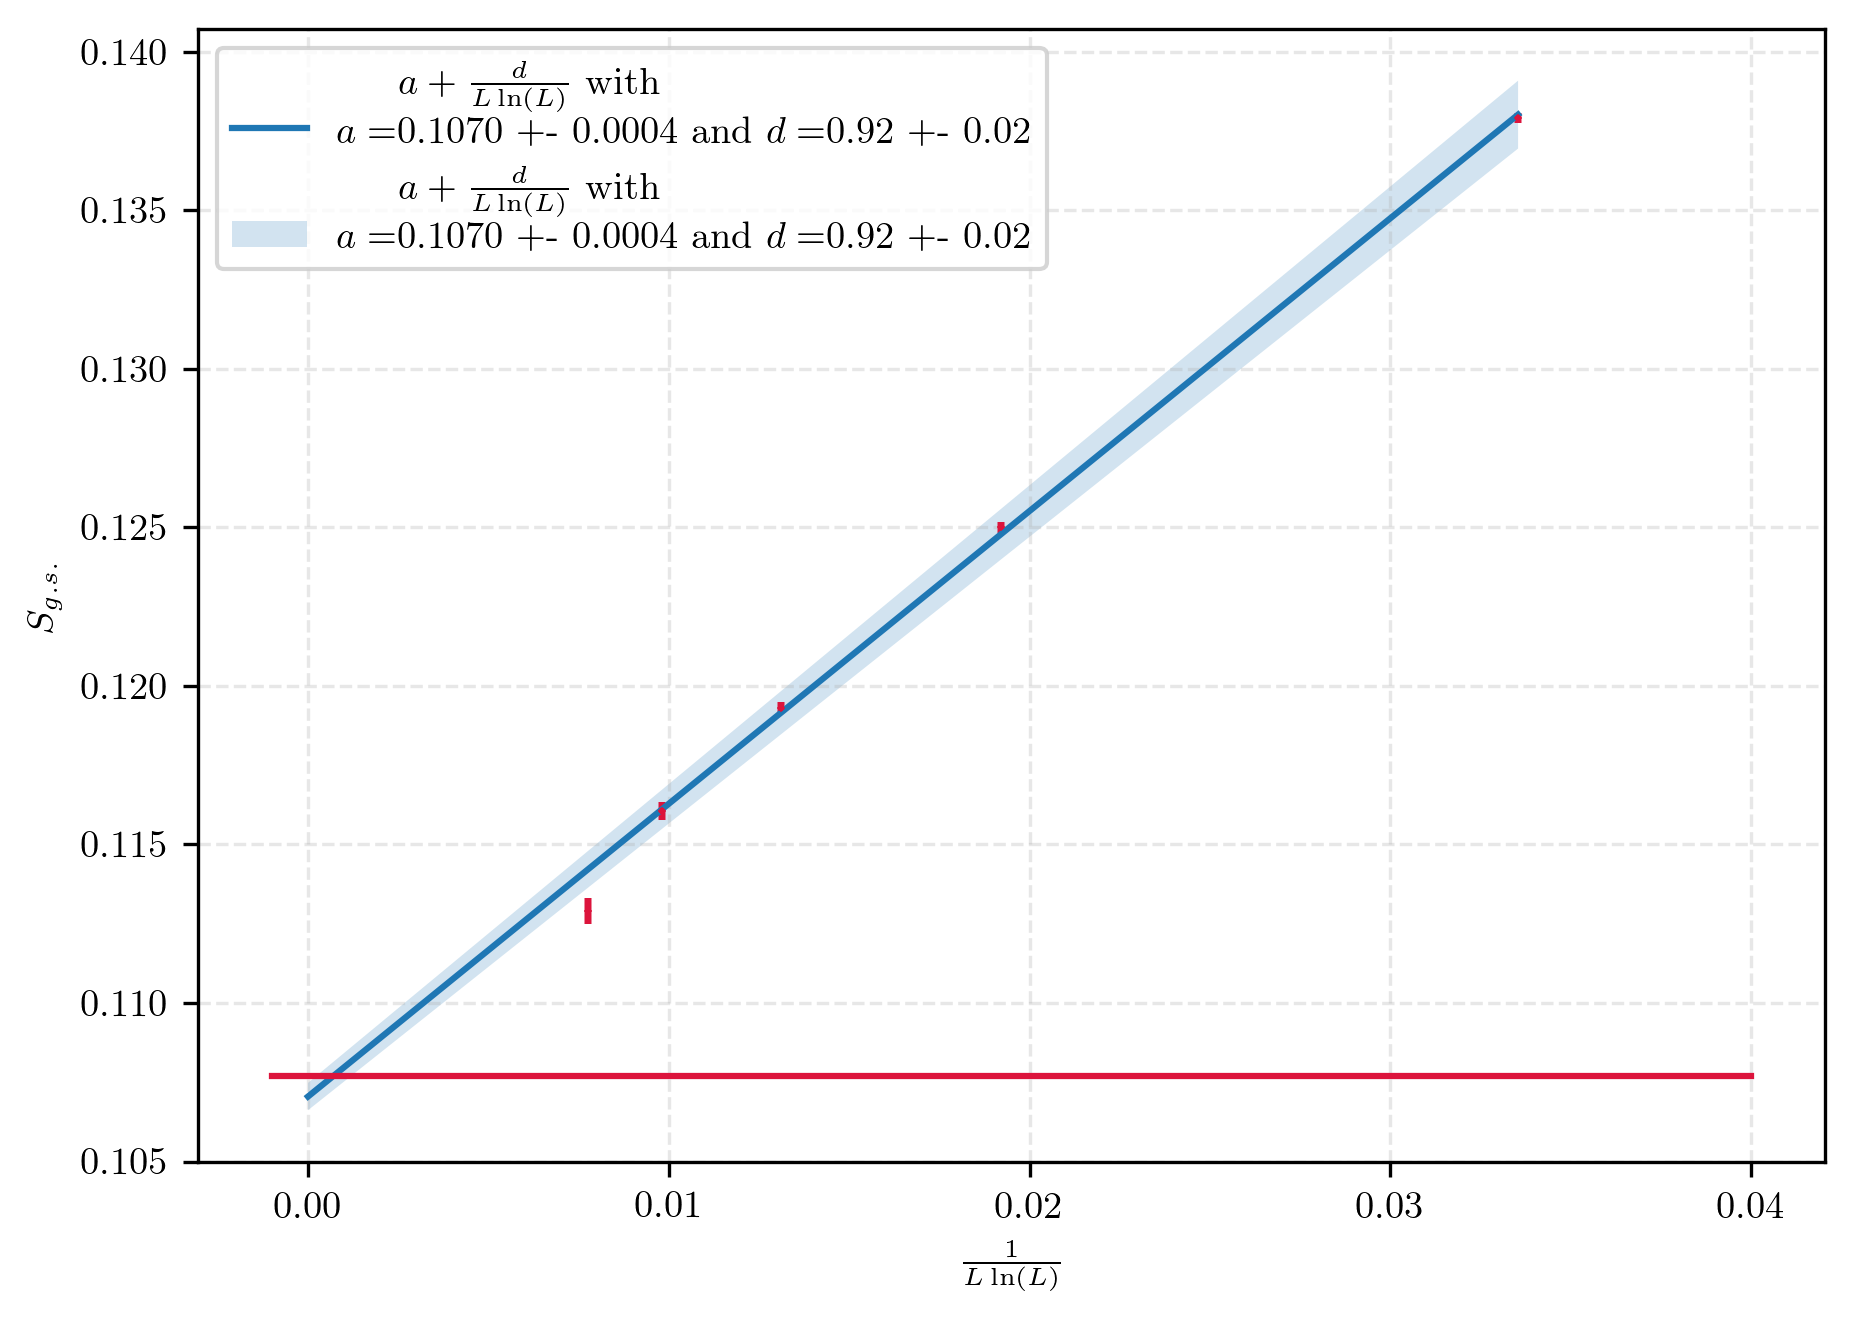

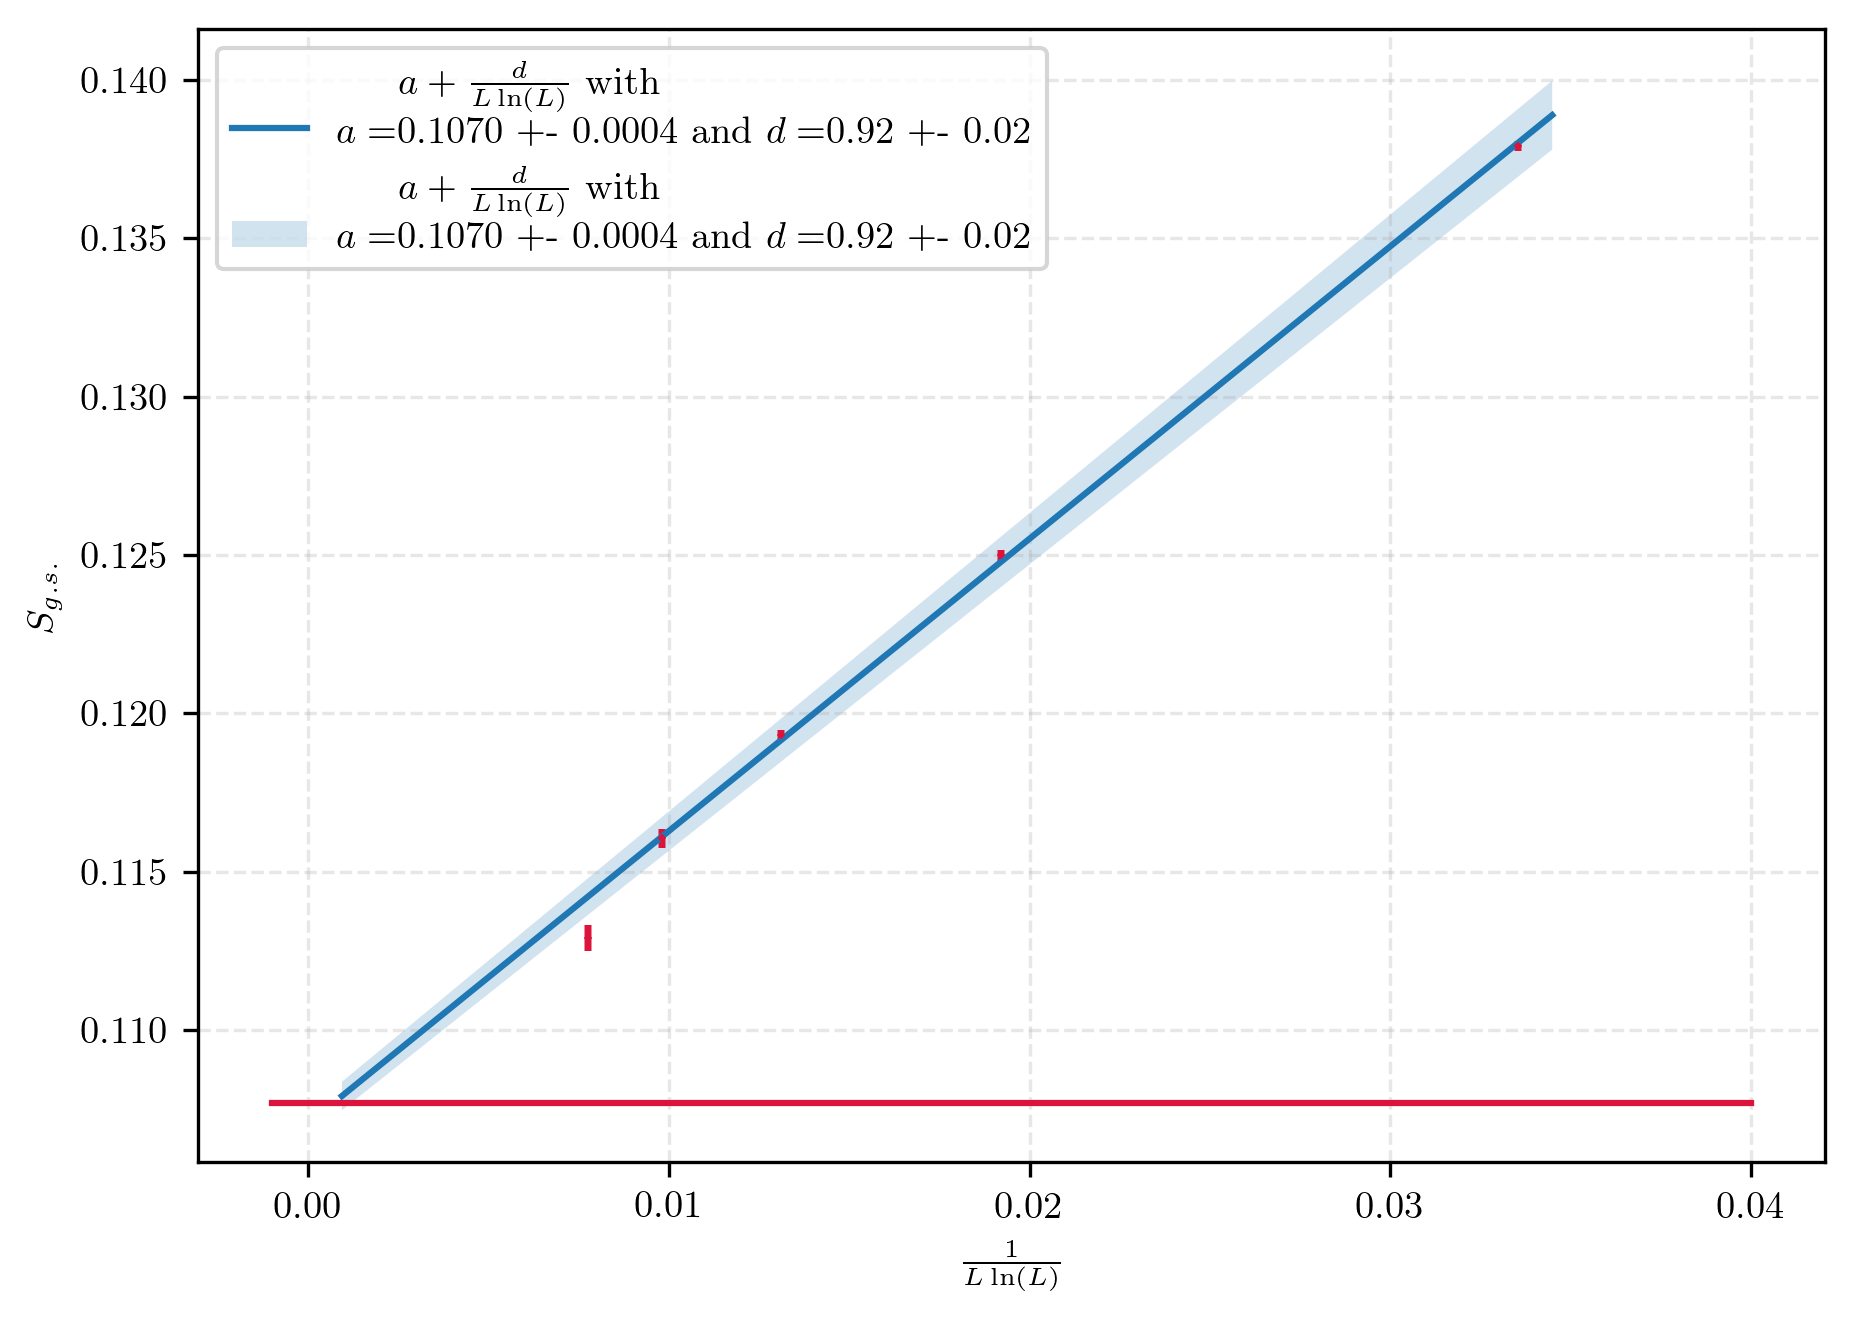

In [24]:
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
for i in range(n):
    ax.errorbar(1/(xdata*np.log(xdata)),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.04],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L\ln(L)}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)

fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
fitlabel = r"$a + \frac{d}{L \ln (L) }$ with \\ $a = $" + f"{popt[0]:.4f} +- {np.sqrt(perr[0,0]):.4f} and "+\
r"$d = $" + f"{popt[1]:.2f} +- {np.sqrt(perr[1,1]):.2f}"
plt.plot(1./(xvals*np.log(xvals)),LlogLfitSimple(xvals,*popt), label = fitlabel)
plt.fill_between(1./(xvals*np.log(xvals)),LlogLfitSimple(xvals,*(popt+np.sqrt(np.diag(perr)))),
                 LlogLfitSimple(xvals,*(popt-np.sqrt(np.diag(perr)))), label = fitlabel, alpha = 0.2)
for i in range(n):
    ax.errorbar(1/(xdata*np.log(xdata)),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.04],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L\ln(L)}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.legend()
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)

fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
fitlabel = r"$a + \frac{d}{L \ln (L) }$ with \\ $a = $" + f"{popt2[0]:.4f} +- {np.sqrt(perr2[0,0]):.4f} and "+\
r"$d = $" + f"{popt2[1]:.2f} +- {np.sqrt(perr2[1,1]):.2f}"
plt.plot(ovxvals/np.log(1/ovxvals),LlogLfitSimple2(ovxvals,*popt2), label = fitlabel)
plt.fill_between(ovxvals/np.log(1/ovxvals),LlogLfitSimple2(ovxvals,*(popt2+np.sqrt(np.diag(perr2)))),
                 LlogLfitSimple2(ovxvals,*(popt2-np.sqrt(np.diag(perr2)))), label = fitlabel, alpha = 0.2)
for i in range(n):
    ax.errorbar(1/(xdata*np.log(xdata)),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.04],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L\ln(L)}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.legend()
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)

In [25]:
def LlogLfit(x, a, d, g):
    return a + d/(x*np.log(x)) + g/x**2

In [ ]:
def LlogLfit2(ovx, a, d, g):
    return a - d*ovx/np.log(ovx) + g*ovx**2

In [ ]:
abssigma = False

In [ ]:
idmin = 0
idmax = 6
[popt, perr] = curve_fit(LlogLfit, xdata[idmin:idmax],
                         ydata[idmin:idmax], 
                         sigma = sigma[idmin:idmax], 
                         absolute_sigma = abssigma)
print("a = ", f"{popt[0]:.4f} +/- {np.sqrt(perr[0,0]):.4f}")
print("d = ", f"{popt[1]:.4f} +/- {np.sqrt(perr[1,1]):.4f}")
print("g = ", f"{popt[2]:.4f} +/- {np.sqrt(perr[2,2]):.4f}")

[popt2, perr2] = curve_fit(LlogLfit2, ovxdata[idmin:idmax],
                         ydata[idmin:idmax], 
                         sigma = sigma[idmin:idmax], 
                         absolute_sigma = abssigma)

print("a = ", f"{popt2[0]:.4f} +/- {np.sqrt(perr2[0,0]):.4f}")
print("d = ", f"{popt2[1]:.4f} +/- {np.sqrt(perr2[1,1]):.4f}")
print("g = ", f"{popt2[2]:.4f} +/- {np.sqrt(perr2[2,2]):.4f}")


In [ ]:
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
for i in range(n):
    ax.errorbar(1/(xdata*np.log(xdata)),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.04],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L\ln(L)}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)

fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
fitlabel = r"$a + \frac{d}{L \ln (L) } + \frac{g}{N}$ with \\ $a = $" + f"{popt[0]:.4f} +- {np.sqrt(perr[0,0]):.4f}, "+\
r"$d = $" + f"{popt[1]:.2f} +- {np.sqrt(perr[1,1]):.2f} and " + r"$g = $" + f"{popt[2]:.2f} +- {np.sqrt(perr[2,2]):.2f}"
plt.plot(1./(xvals*np.log(xvals)),LlogLfit(xvals,*popt), label = fitlabel)
plt.fill_between(1./(xvals*np.log(xvals)),LlogLfit(xvals,*(popt+np.sqrt(np.diag(perr)))),
                 LlogLfit(xvals,*(popt-np.sqrt(np.diag(perr)))), label = fitlabel, alpha = 0.2)
for i in range(n):
    ax.errorbar(1/(xdata*np.log(xdata)),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.04],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L\ln(L)}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.legend()
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)


In [ ]:
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
fitlabel = r"$a + \frac{d}{L \ln (L) } + \frac{g}{N}$ with \\ $a = $" + f"{popt[0]:.4f} +- {np.sqrt(perr[0,0]):.4f}, "+\
r"$d = $" + f"{popt[1]:.2f} +- {np.sqrt(perr[1,1]):.2f} and " + r"$g = $" + f"{popt[2]:.2f} +- {np.sqrt(perr[2,2]):.2f}"
plt.plot(1./(xvals**2),LlogLfit(xvals,*popt), label = fitlabel)
for i in range(n):
    ax.errorbar(1/(xdata**2),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.008],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{N}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.legend()
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)


### 3. 1/L corrections

In [ ]:
def OneOvLfitSimple(x, a, c):
    return a + c/x

In [ ]:
idmin = 1
idmax = 6
[popt, perr] = curve_fit(OneOvLfitSimple, xdata[idmin:idmax], ydata[idmin:idmax], sigma = 2*sigma[idmin:idmax], absolute_sigma = True)


In [ ]:
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
for i in range(n):
    ax.errorbar(1/(xdata),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.08],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)

fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
fitlabel = r"$a + \frac{c}{L}$ with \\ $a = $" + f"{popt[0]:.4f} +- {np.sqrt(perr[0,0]):.4f} and "+\
r"$c = $" + f"{popt[1]:.2f} +- {np.sqrt(perr[1,1]):.2f}"
plt.plot(1./(xvals),OneOvLfitSimple(xvals,*popt), label = fitlabel)
for i in range(n):
    ax.errorbar(1/(xdata),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.08],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.legend()
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)


In [ ]:
def OneOvLfit(x, a, c, g):
    return a + c/x + g/x**2

In [ ]:
idmin = 0
idmax = 8
[popt, perr] = curve_fit(OneOvLfit, xdata[idmin:idmax], 
                         ydata[idmin:idmax], 
                         sigma = sigma[idmin:idmax], 
                         absolute_sigma = True)


In [ ]:
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
for i in range(n):
    ax.errorbar(1/(xdata),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.08],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)

fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
fitlabel = r"$a + \frac{c}{L} + \frac{g}{N}$ with \\ $a = $" + f"{popt[0]:.4f} +- {np.sqrt(perr[0,0]):.4f}; "+\
r"$c = $" + f"{popt[1]:.2f} +- {np.sqrt(perr[1,1]):.2f} and " +\
r"$g = $" + f"{popt[2]:.2f} +- {np.sqrt(perr[2,2]):.2f}"
plt.plot(1./(xvals),OneOvLfit(xvals,*popt), label = fitlabel)
plt.fill_between(1./xvals,OneOvLfit(xvals,*(popt+np.sqrt(np.diag(perr)))),
                 OneOvLfit(xvals,*(popt-np.sqrt(np.diag(perr)))), alpha = 0.2)
for i in range(n):
    ax.errorbar(1/(xdata),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.08],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.legend()
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)


### 4. log(L)/L corrections

In [ ]:
def LogLOvLfitSimple(x, a, b):
    return a + b*np.log(x)/x

In [ ]:
idmin = 1
idmax = 7
[popt, perr] = curve_fit(LogLOvLfitSimple, xdata[idmin:idmax], 
                         ydata[idmin:idmax], 
                         sigma = sigma[idmin:idmax], 
                         absolute_sigma = False)
print("a = ", f"{popt[0]:.4f} +/- {np.sqrt(perr[0,0]):.4f}")
print("b = ", f"{popt[1]:.4f} +/- {np.sqrt(perr[1,1]):.4f}")

In [ ]:
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
for i in range(n):
    ax.errorbar(np.log(xdata)/xdata,ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.2],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L}\ln(L)$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)

fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
fitlabel = r"$a + \frac{b \ln(L)}{L} $ with \\ $a = $" + f"{popt[0]:.4f} +- {np.sqrt(perr[0,0]):.4f} and "+\
r"$b = $" + f"{popt[1]:.2f} +- {np.sqrt(perr[1,1]):.2f} "
plt.plot(np.log(xvals)/(xvals),LogLOvLfitSimple(xvals,*popt), label = fitlabel)
#plt.fill_between(1./xvals,OneOvLfit(xvals,*(popt+np.sqrt(np.diag(perr)))),
#                 OneOvLfit(xvals,*(popt-np.sqrt(np.diag(perr)))), alpha = 0.2)
for i in range(n):
    ax.errorbar(np.log(xdata)/(xdata),ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.2],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{\ln(L)}{L}$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.legend()
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)


In [ ]:
def logfit(x,a, b, c, d):
    return  a + b*np.log(x)/x + c/x + d /x**2 

In [ ]:
idmin = 0
idmax = 7

In [ ]:
[poptlog, perrlog] = curve_fit(logfit, xdata[idmin:idmax], 
                         ydata[idmin:idmax])


In [ ]:
lab = ["a","b","c","d"]

In [ ]:
for i in range(4):
    print(lab[i], " = ", f"{poptlog[i]:.3f}", "+/-", f"{np.sqrt(perrlog[i,i]):.3f}")

In [ ]:
perrlog[[]]

In [ ]:
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
Lvals = np.linspace(4,10000,30000)
plt.plot(1/(3*Lvals)*np.log(3*Lvals), logfit(3*Lvals, *poptlog))
for i in range(n):
    ax.errorbar(1/xdataln*np.log(xdataln),ydataln, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.2],[0.1076887, 0.1076887], color = 'crimson')
ax.set_xlabel(r'$\frac{1}{L}\ln(L)$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)


In [ ]:
def logfit2(x,a,b):
    return a+b*np.log(x)/x
idminlog = 2
idmaxlog = 7
[poptlog,perrlog] = curve_fit(logfit2, xdataln[idminlog:idmaxlog], ydataln[idminlog:idmaxlog])

In [ ]:
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
xvals = np.linspace(0,0.09)
ax.plot(xvals,poly(xvals, *popt), '--', color = 'lightgrey')
ax.errorbar(0, popt[-1], yerr = np.sqrt(perr[-1,-1]), color = 'lightgrey')
ax.plot(xvals,poly(xvals, *popt2), '--', color = 'lightblue')
ax.errorbar(0, popt2[-1], yerr = np.sqrt(perr2[-1,-1]), color = 'lightblue')
for i in range(n):
    ax.errorbar(xdata,ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.09],[0.1076887, 0.1076887], color = 'crimson')
axin1 = ax.inset_axes([0.12, 0.6, 0.4,0.4])

for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 0
    tidmax = len(temperatures_plots[0])-1
    axin1.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax],fmts[i], markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    axin1.fill_between(temp[tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
axin1.set_xlabel(r'$T/|J_2|$')
axin1.set_ylabel(r'$c$')
axin1.set_xticks([1e-1, 1, 1e2])
axin1.grid(which = 'both', linestyle = '--', alpha = 0.3)
axin1.legend(ncol = 1, loc = 'upper left', bbox_to_anchor = [1.05,1.05])
ax.set_xlabel(r'$1/L$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)


In [ ]:
fix, ax = plt.subplots(figsize=(7,5), dpi = 300)
axin = ax.inset_axes([0.12, 0.6, 0.4,0.4])
markersize = 3
xvals = np.linspace(0,0.09)
axin.plot(xvals,poly(xvals, *popt), '--', color = 'lightgrey')
axin.errorbar(0, popt[-1], yerr = np.sqrt(perr[-1,-1]), color = 'lightgrey')
axin.plot(xvals,poly(xvals, *popt2), '--', color = 'lightblue')
axin.errorbar(0, popt2[-1], yerr = np.sqrt(perr2[-1,-1]), color = 'lightblue')
for i in range(n):
    axin.errorbar(xdata,ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
axin.plot([-0.001, 0.09],[0.1076887, 0.1076887], color = 'crimson')

for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 0
    tidmaxin = len(temperatures_plots[0])-1
    ax.semilogx(temp[tidmin:tidmaxin],
                 C[i][tidmin:tidmaxin],fmts[i], markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    ax.fill_between(temp[tidmin:tidmaxin],
                     C[i][tidmin:tidmaxin]-ErrC[i][tidmin:tidmaxin],
                     C[i][tidmin:tidmaxin]+ErrC[i][tidmin:tidmaxin],
                     alpha=0.2)
ax.set_xlabel(r'$T/|J_2|$')
ax.set_ylabel(r'$c$')
ax.set_xticks([1e-2, 1])
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)
ax.legend(ncol = 1, loc = 'upper left', bbox_to_anchor = [0.75,1])
axin.set_xlabel(r'$1/L$')
axin.set_ylabel(r'$S_{g.s.}$')
axin.grid(which = 'both', linestyle = '--', alpha = 0.3)


In [ ]:
idmin2 = 2
def poly2(x, a, b):
    return a*x + b
xdata2 = 1./(9*np.array(L)**2)
[popt3, perr3] = curve_fit(poly2, xdata2[idmin2:], ydata[idmin2:], sigma = sigma[idmin2:], absolute_sigma = True)

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(8,6), dpi = 300)

for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 0
    tidmax = len(temperatures_plots[0])-1
    ax1.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax],fmts[i], markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    ax1.fill_between(temp[tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
ax1.set_xlabel(r'$T/|J_2|$')
ax1.set_ylabel(r'$c$')
ax1.set_xticks([1e-2, 1])
ax1.grid(which = 'both', linestyle = '--', alpha = 0.3)
#ax1.legend(ncol = 1, loc = 'upper left', bbox_to_anchor = [0,1])


for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 100
    tidmax = 180
    ax2.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax],fmts[i], markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    ax2.fill_between(temp[tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
ax2.set_xlabel(r'$T/|J_2|$')
ax2.set_ylabel(r'$c$')
ax2.grid(which = 'both', linestyle = '--', alpha = 0.3)
#ax2.set_xlim()
#ax2.set_xtickslabels(['1','2','3','4','5', '6'])
ax2.legend(ncol = 1, loc = 'upper left', bbox_to_anchor = [0.6,1])



xvals = np.linspace(0,0.09)
ax3.plot(xvals,poly(xvals, *popt), '--', color = 'lightgrey')
ax3.errorbar(0, popt[-1], yerr = np.sqrt(perr[-1,-1]), color = 'lightgrey')
#ax3.plot(xvals,poly(xvals, *popt2), '--', color = 'lightblue')
#ax3.errorbar(0, popt2[-1], yerr = np.sqrt(perr2[-1,-1]), color = 'lightblue')
for i in range(n):
    ax3.errorbar(xdata,ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax3.plot([-0.001, 0.09],[0.1076887, 0.1076887], color = 'crimson')
ax3.set_xlabel(r'$1/L$')
ax3.set_ylabel(r'$S_{g.s.}$')
ax3.grid(which = 'both', linestyle = '--', alpha = 0.3)

xvals2 = np.linspace(0,0.007)
sizes = np.array([1/(9*(L[i]**2)) for i in range(n)])
values = np.array([S[i][0] for i in range(n)])
ax4.plot(xvals2, poly2(xvals2, *popt3), '--', color = 'lightblue')
ax4.errorbar(0, popt3[-1], yerr = np.sqrt(perr3[-1,-1]), color = 'lightblue')
for i in range(n):
    ax4.errorbar(1/(9*L[i]**2),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')
ax4.plot([-0.0001, 0.007],[0.1076887, 0.1076887], color = 'crimson')

ax4.grid(which = 'both', linestyle = '--', alpha = 0.3)
ax4.set_xlabel(r'$1/N$')
ax4.set_ylabel(r'$S_{g.s.}$')
plt.tight_layout()

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(6,6), dpi = 300)

for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 100
    tidmax = 180
    ax1.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax],fmts[i], markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    ax1.fill_between(temp[tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
ax1.set_xlabel(r'$T/|J_2|$')
ax1.set_ylabel(r'$c$')
ax1.grid(which = 'both', linestyle = '--', alpha = 0.3)
#ax1.set_xlim()
#ax1.set_xtickslabels(['1','2','3','4','5', '6'])
ax1.legend(ncol = 1, loc = 'upper right', bbox_to_anchor = [1.1,1.1])

axin1 = ax1.inset_axes([0.35, 0.2, 0.35,0.3])
for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 0
    tidmax = len(temperatures_plots[0])-1
    axin1.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax],fmts[i], markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    axin1.fill_between(temp[tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
axin1.set_xlabel(r'$T/|J_2|$')
axin1.set_ylabel(r'$c$')
axin1.set_xticks([1e-2, 1])
axin1.grid(which = 'both', linestyle = '--', alpha = 0.3)
#axin1.legend(ncol = 1, loc = 'upper left', bbox_to_anchor = [0,1])




xvals2 = np.linspace(0,0.007)
sizes = np.array([1/(9*(L[i]**2)) for i in range(n)])
values = np.array([S[i][0] for i in range(n)])
ax2.plot(xvals2, poly2(xvals2, *popt3), '--', color = 'lightblue')
ax2.errorbar(0, popt3[-1], yerr = np.sqrt(perr3[-1,-1]), color = 'lightblue')
for i in range(n):
    ax2.errorbar(1/(9*L[i]**2),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')
ax2.plot([-0.0001, 0.007],[0.1076887, 0.1076887], color = 'crimson')

ax2.grid(which = 'both', linestyle = '--', alpha = 0.3)
ax2.set_xlabel(r'$1/N$')
ax2.set_ylabel(r'$S_{g.s.}$')
axin2 = ax2.inset_axes([0.2, 0.6, 0.3,0.3])
xvals = np.linspace(0,0.09)
axin2.plot(xvals,poly(xvals, *popt), '--', color = 'lightgrey')
axin2.errorbar(0, popt[-1], yerr = np.sqrt(perr[-1,-1]), color = 'lightgrey')
#axin2.plot(xvals,poly(xvals, *popt2), '--', color = 'lightblue')
#axin2.errorbar(0, popt2[-1], yerr = np.sqrt(perr2[-1,-1]), color = 'lightblue')
for i in range(n):
    axin2.errorbar(xdata,ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
axin2.plot([-0.001, 0.09],[0.1076887, 0.1076887], color = 'crimson')
axin2.set_xlabel(r'$1/L$')
axin2.set_ylabel(r'$S_{g.s.}$')
axin2.grid(which = 'both', linestyle = '--', alpha = 0.3)

plt.tight_layout()

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(6,6), dpi = 300)


for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 0
    tidmax = len(temperatures_plots[0])-1
    ax1.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax],fmts[i], markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    ax1.fill_between(temp[tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
ax1.set_xlabel(r'$T/|J_2|$')
ax1.set_ylabel(r'$c$')
ax1.set_xticks([1e-2, 1])
ax1.grid(which = 'both', linestyle = '--', alpha = 0.3)
ax1.legend(ncol = 1, loc = 'upper right', bbox_to_anchor = [1,1])




xvals2 = np.linspace(0,0.007)
sizes = np.array([1/(9*(L[i]**2)) for i in range(n)])
values = np.array([S[i][0] for i in range(n)])
ax2.plot(xvals2, poly2(xvals2, *popt3), '--', color = 'lightblue')
ax2.errorbar(0, popt3[-1], yerr = np.sqrt(perr3[-1,-1]), color = 'lightblue')
for i in range(n):
    ax2.errorbar(1/(9*L[i]**2),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')
ax2.plot([-0.0001, 0.007],[0.1076887, 0.1076887], color = 'crimson')

ax2.grid(which = 'both', linestyle = '--', alpha = 0.3)
ax2.set_xlabel(r'$1/N$')
ax2.set_ylabel(r'$S_{g.s.}$')
axin2 = ax2.inset_axes([0.2, 0.6, 0.3,0.3])
xvals = np.linspace(0,0.09)
axin2.plot(xvals,poly(xvals, *popt), '--', color = 'lightgrey')
axin2.errorbar(0, popt[-1], yerr = np.sqrt(perr[-1,-1]), color = 'lightgrey')
#axin2.plot(xvals,poly(xvals, *popt2), '--', color = 'lightblue')
#axin2.errorbar(0, popt2[-1], yerr = np.sqrt(perr2[-1,-1]), color = 'lightblue')
for i in range(n):
    axin2.errorbar(xdata,ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
axin2.plot([-0.001, 0.09],[0.1076887, 0.1076887], color = 'crimson')
axin2.set_xlabel(r'$1/L$')
axin2.set_ylabel(r'$S_{g.s.}$')
axin2.grid(which = 'both', linestyle = '--', alpha = 0.3)

plt.tight_layout()

In [ ]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':9})
rc('text', usetex=True)
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))

fm.findfont("serif", rebuild_if_missing=False)

In [ ]:
 #fig, (ax1,ax2) = plt.subplots(2,1, figsize=(6,6), dpi = 300)
plt.subplots(2,2, figsize = (4,3), dpi = 250)
markersize = 1
ax1 = plt.subplot(212)
for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 0 
    tidmax = len(temperatures_plots[0])-1
    ax1.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax],fmts[i], markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    ax1.fill_between(temp[tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
ax1.set_xlabel(r'$T/|J_2|$', fontweight = 'bold')
ax1.set_xlim([None, 200])
ax1.set_ylabel(r'$c$', fontweight = 'bold')
ax1.tick_params(which = 'both', direction = 'in')
ax1.legend(ncol = 1, loc = 'lower right', bbox_to_anchor = [1.1,-0.3], framealpha = 1,fancybox = False,edgecolor = '0.2')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.text(0.017,0.25, '(c)')


ylims = [0.097, 0.14]
ax2 = plt.subplot(222)
xvals2 = np.linspace(0,0.007)
sizes = np.array([1/(9*(L[i]**2)) for i in range(n)])
values = np.array([S[i][0] for i in range(n)])
for i in range(2):
    ax2.errorbar(1/(9*L[i]**2),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=3, elinewidth = 0.5,color = 'peachpuff', alpha = 1)
for i in range(n):
    ax2.errorbar(1/(9*L[i]**2),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=3, elinewidth = 0.5,color = 'crimson')
ax2.set_xlabel(r'$1/N$')
ax2.set_ylabel(r'$S$')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(direction = 'in')
ax2.text(0.0,0.13, '(b)')
ax2.set_ylim(ylims)

#ax2.plot(xvals2, poly2(xvals2, *popt3), ':', linewidth=1,color = 'lightblue')
#ax2.errorbar(0, popt3[-1], yerr = np.sqrt(perr3[-1,-1]), color = 'lightblue')
ax2.plot([-0.0001, 0.007],[0.1076887, 0.1076887], color = 'crimson')

#axin2 = ax2.inset_axes([0.2, 0.6, 0.3,0.3])
axin2 = plt.subplot(221)
xvals = np.linspace(0,0.09)

axin2.plot([-0.001, 0.09],[0.1076887, 0.1076887], color = 'crimson')

#axin2.plot(xvals,poly(xvals, *popt), ':', linewidth = 1, color = 'lightgrey')
#axin2.errorbar(0, popt[-1], yerr = np.sqrt(perr[-1,-1]), color = 'lightgrey')
#axin2.plot(xvals,poly(xvals, *popt2), '--', color = 'lightblue')
#axin2.errorbar(0, popt2[-1], yerr = np.sqrt(perr2[-1,-1]), color = 'lightblue')
for i in range(n):
    axin2.errorbar(xdata,ydata, yerr = sigma,
                 fmt = '.', markersize=3, elinewidth=0.5,color = 'crimson')
axin2.set_xlabel(r'$1/L$')
axin2.set_ylabel(r'$S$')
axin2.set_ylim(ylims)
axin2.text(0.0,0.13, '(a)')
axin2.tick_params(direction = 'in')

axin2.spines['top'].set_visible(False)
axin2.spines['right'].set_visible(False)

plt.tight_layout()


plt.savefig('./' + foldername  + results_foldername+ '/MCFailingEntropy.pdf')

In [ ]:
### fix, ax = plt.subplots(figsize=(5,4), dpi = 300)
ax.plot(np.linspace(0,0.09),poly(np.linspace(0,0.09), *popt), '--', color = 'lightgrey')
ax.errorbar(0, popt[-1], yerr = np.sqrt(perr[-1,-1]), color = 'lightgrey')
for i in range(n):
    ax.errorbar(xdata,ydata, yerr = sigma,
                 fmt = 'x', markersize=markersize, color = 'crimson')
ax.plot([-0.001, 0.09],[0.10769, 0.10769], color = 'lightgrey')
axin1 = ax.inset_axes([0.1, 0.6, 0.4,0.4])
for i in range(n):
    temp = temperatures_plots[0]
    tidmin = 0
    tidmax = len(temperatures_plots[0])-1
    axin1.semilogx(temp[tidmin:tidmax],
                 C[i][tidmin:tidmax],fmts[i], markersize=markersize,\
                      label = r'$N$ = {0}'.format(9*L[i]**2))
    axin1.fill_between(temp[tidmin:tidmax],
                     C[i][tidmin:tidmax]-ErrC[i][tidmin:tidmax],
                     C[i][tidmin:tidmax]+ErrC[i][tidmin:tidmax],
                     alpha=0.2)
axin1.set_xlabel(r'$T/|J_2|$')
axin1.set_ylabel(r'$c$')
axin1.grid(which = 'both', linestyle = '--', alpha = 0.3)

ax.set_xlabel(r'$1/L$')
ax.set_ylabel(r'$S_{g.s.}$')
ax.grid(which = 'both', linestyle = '--', alpha = 0.3)


In [ ]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
plt.plot([-0.01, 0.09],[0.10769, 0.10769])
for i in range(n):
    plt.errorbar(xdata,ydata, yerr = sigma,
                 fmt = '.', markersize=markersize, color = 'crimson')
plt.plot(np.linspace(0,0.09),poly(np.linspace(0,0.09), *popt))
plt.errorbar(0, popt[-1], yerr = np.sqrt(perr[-1,-1]))

plt.xlabel(r'$1/L$')
plt.ylabel(r'$S_{g.s.}$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes.png')

In [ ]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
#plt.plot([0, 0.51],[0.10769, 0.10769])
for i in range(n):
    plt.errorbar(3*L[i],S[i][0]-0.10769, yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')
plt.xlabel(r'$L$')
#plt.xlim([0,0.1])
plt.ylabel(r'$S_{g.s.}$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes_Error.png')

In [ ]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])

sizes = np.array([1/(3*(L[i])) for i in range(n)])
values = np.array([S[i][0] for i in range(n)])
for i in range(n):
    plt.errorbar(1/(3*L[i]),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')

             
p, V = np.polyfit(sizes, values, 1, full = False, cov = True)
x = np.linspace(0,0.1)
plt.errorbar(0, p[1], yerr =[np.sqrt(V[1,1])])
plt.plot(x, p[0]*x + p[1])
plt.xlabel(r'$1/L$')
plt.plot([0, 0.008],[0.10769, 0.10769])
plt.ylabel(r'$S_{g.s.}$')
#plt.xlim([-0.0001,None])
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes_N.png')

In [ ]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])

sizes = np.array([1/(9*(L[i]**2)) for i in range(n)])
values = np.array([S[i][0] for i in range(n)])
for i in range(n):
    plt.errorbar(1/(9*L[i]**2),S[i][0], yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')

             
plt.xlabel(r'$1/N$')
plt.plot([0, 0.008],[0.10769, 0.10769])
plt.ylabel(r'$S_{g.s.}$')
#plt.xlim([-0.0001,None])
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes_N.png')

In [ ]:
np.sqrt(V[1,1])

In [ ]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
#plt.plot([0, 0.51],[0.10769, 0.10769])
for i in range(n):
    plt.errorbar(9*L[i]**2,S[i][0]-0.10769, yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')
plt.xlabel(r'$N$')
#plt.xlim([0,0.1])
plt.ylabel(r'$S_{g.s.} - S_{exact}$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes_N_Error.png')

In [ ]:
plt.figure(figsize=figsize,dpi=300)
margin = [0.12, 0.2, 0.02, 0.02]
plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
#plt.plot([0, 0.51],[0.10769, 0.10769])
for i in range(n):
    plt.errorbar(1/(3*L[i]),S[i][0]-0.10769, yerr = [[abs(S[i][0]-Smin[i][0])],[abs(S[i][0]-Smax[i][0])]],
                 fmt = '.', markersize=markersize, color = 'crimson')
plt.plot([1/(3*L[0]), 1/(3*L[5])], -0.009 + 0.47*1./np.array([3*L[0], 3*L[5]]))
plt.xlabel(r'$1/L$')
plt.ylim([0,None])
plt.xlim([0,None])
plt.ylabel(r'$S_{g.s.} - S_{exact}$')
plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
plt.savefig('./' + foldername  + results_foldername+ '/ResidualEntropy_VariousSizes_N_Error.png')